In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Imp Projects\NIDS Project\Data\NF-UNSW-NB15-v3.csv')
features = pd.read_csv(r'D:\Imp Projects\NIDS Project\Data\NetFlow_v3_Features.csv')

In [3]:
df.shape

(2365424, 55)

In [4]:
df.head()

,FLOW_START_MILLISECONDS,FLOW_END_MILLISECONDS,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,...,SRC_TO_DST_IAT_MIN,SRC_TO_DST_IAT_MAX,SRC_TO_DST_IAT_AVG,SRC_TO_DST_IAT_STDDEV,DST_TO_SRC_IAT_MIN,DST_TO_SRC_IAT_MAX,DST_TO_SRC_IAT_AVG,DST_TO_SRC_IAT_STDDEV,Label,Attack
0,1424242193040,1424242193043,59.166.0.2,4894,149.171.126.3,53,17,5.0,146,2,...,0,0,0,0,0,0,0,0,0,Benign
1,1424242192744,1424242193079,59.166.0.4,52671,149.171.126.6,31992,6,11.0,4704,28,...,0,91,12,19,0,90,12,19,0,Benign
2,1424242190649,1424242193109,59.166.0.0,47290,149.171.126.9,6881,6,37.0,13662,238,...,0,1843,10,119,0,1843,5,88,0,Benign
3,1424242193145,1424242193146,59.166.0.8,43310,149.171.126.7,53,17,5.0,146,2,...,0,0,0,0,0,0,0,0,0,Benign
4,1424242193239,1424242193241,59.166.0.1,45870,149.171.126.1,53,17,5.0,130,2,...,0,0,0,0,0,0,0,0,0,Benign


In [5]:
features

,Feature,Description
0,IPV4_SRC_ADDR,IPv4 source address
1,IPV4_DST_ADDR,IPv4 destination address
2,L4_SRC_PORT,IPv4 source port number
3,L4_DST_PORT,IPv4 destination port number
4,PROTOCOL,IP protocol identifier byte
5,L7_PROTO,Layer 7 protocol (numeric)
6,IN_BYTES,Incoming number of bytes
7,OUT_BYTES,Outgoing number of bytes
8,IN_PKTS,Incoming number of packets
9,OUT_PKTS,Outgoing number of packets


In [6]:
df.isna().sum()

FLOW_START_MILLISECONDS            0
FLOW_END_MILLISECONDS              0
IPV4_SRC_ADDR                      0
L4_SRC_PORT                        0
IPV4_DST_ADDR                      0
L4_DST_PORT                        0
PROTOCOL                           0
L7_PROTO                           0
IN_BYTES                           0
IN_PKTS                            0
OUT_BYTES                          0
OUT_PKTS                           0
TCP_FLAGS                          0
CLIENT_TCP_FLAGS                   0
SERVER_TCP_FLAGS                   0
FLOW_DURATION_MILLISECONDS         0
DURATION_IN                        0
DURATION_OUT                       0
MIN_TTL                            0
MAX_TTL                            0
LONGEST_FLOW_PKT                   0
SHORTEST_FLOW_PKT                  0
MIN_IP_PKT_LEN                     0
MAX_IP_PKT_LEN                     0
SRC_TO_DST_SECOND_BYTES        63425
DST_TO_SRC_SECOND_BYTES            0
RETRANSMITTED_IN_BYTES             0
R

In [7]:
df.isin([np.inf, -np.inf]).sum()

FLOW_START_MILLISECONDS             0
FLOW_END_MILLISECONDS               0
IPV4_SRC_ADDR                       0
L4_SRC_PORT                         0
IPV4_DST_ADDR                       0
L4_DST_PORT                         0
PROTOCOL                            0
L7_PROTO                            0
IN_BYTES                            0
IN_PKTS                             0
OUT_BYTES                           0
OUT_PKTS                            0
TCP_FLAGS                           0
CLIENT_TCP_FLAGS                    0
SERVER_TCP_FLAGS                    0
FLOW_DURATION_MILLISECONDS          0
DURATION_IN                         0
DURATION_OUT                        0
MIN_TTL                             0
MAX_TTL                             0
LONGEST_FLOW_PKT                    0
SHORTEST_FLOW_PKT                   0
MIN_IP_PKT_LEN                      0
MAX_IP_PKT_LEN                      0
SRC_TO_DST_SECOND_BYTES         59068
DST_TO_SRC_SECOND_BYTES        122493
RETRANSMITTE

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
df.isna().sum()

FLOW_START_MILLISECONDS             0
FLOW_END_MILLISECONDS               0
IPV4_SRC_ADDR                       0
L4_SRC_PORT                         0
IPV4_DST_ADDR                       0
L4_DST_PORT                         0
PROTOCOL                            0
L7_PROTO                            0
IN_BYTES                            0
IN_PKTS                             0
OUT_BYTES                           0
OUT_PKTS                            0
TCP_FLAGS                           0
CLIENT_TCP_FLAGS                    0
SERVER_TCP_FLAGS                    0
FLOW_DURATION_MILLISECONDS          0
DURATION_IN                         0
DURATION_OUT                        0
MIN_TTL                             0
MAX_TTL                             0
LONGEST_FLOW_PKT                    0
SHORTEST_FLOW_PKT                   0
MIN_IP_PKT_LEN                      0
MAX_IP_PKT_LEN                      0
SRC_TO_DST_SECOND_BYTES        122493
DST_TO_SRC_SECOND_BYTES        122493
RETRANSMITTE

In [10]:
df['SRC_TO_DST_SECOND_BYTES'].isna().sum() / len(df) *100

5.178479629867627

(array([1.674987e+06, 2.218410e+05, 1.139880e+05, 1.048530e+05,
        1.198290e+05, 5.511000e+03, 1.886000e+03, 0.000000e+00,
        1.000000e+00, 3.500000e+01]),
 array([   0. ,  441.2,  882.4, 1323.6, 1764.8, 2206. , 2647.2, 3088.4,
        3529.6, 3970.8, 4412. ]),
 <BarContainer object of 10 artists>)

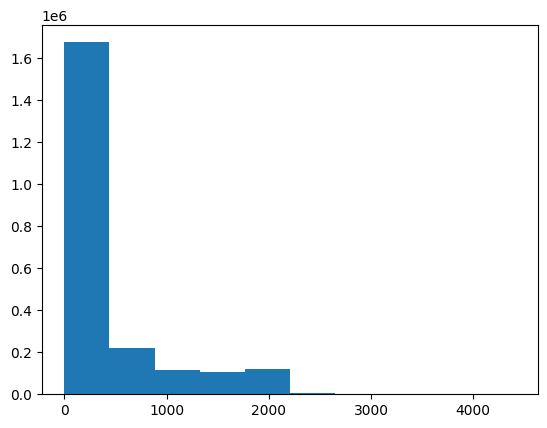

In [11]:
# Now plot the histogram
plt.hist(df['SRC_TO_DST_SECOND_BYTES'])

In [12]:
df['SRC_TO_DST_SECOND_BYTES'].interpolate(method='linear', inplace=True)

(array([2.185571e+06, 4.383800e+04, 1.208900e+04, 1.344000e+03,
        1.200000e+01, 6.300000e+01, 1.200000e+01, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.41665355e-03, 8.71201275e+02, 1.74240113e+03, 2.61360099e+03,
        3.48480085e+03, 4.35600071e+03, 5.22720057e+03, 6.09840042e+03,
        6.96960028e+03, 7.84080014e+03, 8.71200000e+03]),
 <BarContainer object of 10 artists>)

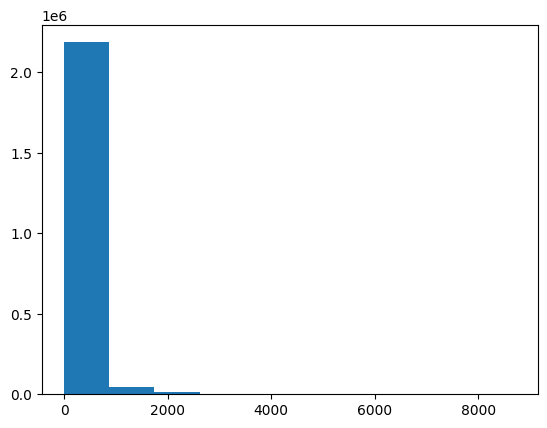

In [13]:
plt.hist(df['DST_TO_SRC_SECOND_BYTES'])

In [14]:
df['DST_TO_SRC_SECOND_BYTES'].interpolate(method='linear', inplace=True)

In [15]:
df.isna().sum()

FLOW_START_MILLISECONDS        0
FLOW_END_MILLISECONDS          0
IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST

In [16]:
df.dtypes

FLOW_START_MILLISECONDS          int64
FLOW_END_MILLISECONDS            int64
IPV4_SRC_ADDR                   object
L4_SRC_PORT                      int64
IPV4_DST_ADDR                   object
L4_DST_PORT                      int64
PROTOCOL                         int64
L7_PROTO                       float64
IN_BYTES                         int64
IN_PKTS                          int64
OUT_BYTES                        int64
OUT_PKTS                         int64
TCP_FLAGS                        int64
CLIENT_TCP_FLAGS                 int64
SERVER_TCP_FLAGS                 int64
FLOW_DURATION_MILLISECONDS       int64
DURATION_IN                      int64
DURATION_OUT                     int64
MIN_TTL                          int64
MAX_TTL                          int64
LONGEST_FLOW_PKT                 int64
SHORTEST_FLOW_PKT                int64
MIN_IP_PKT_LEN                   int64
MAX_IP_PKT_LEN                   int64
SRC_TO_DST_SECOND_BYTES        float64
DST_TO_SRC_SECOND_BYTES  

In [17]:
df['Label'].value_counts(), df['Attack'].value_counts()

(Label
 0    2237731
 1     127693
 Name: count, dtype: int64,
 Attack
 Benign            2237731
 Exploits            42748
 Fuzzers             33816
 Generic             19651
 Reconnaissance      17074
 DoS                  5980
 Backdoor             4659
 Shellcode            2381
 Analysis             1226
 Worms                 158
 Name: count, dtype: int64)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FLOW_START_MILLISECONDS,2365424.0,1.423141e+12,1.144853e+09,1.421927e+12,1.421951e+12,1.424221e+12,1.424242e+12,1.424263e+12
FLOW_END_MILLISECONDS,2365424.0,1.423141e+12,1.144853e+09,1.421927e+12,1.421951e+12,1.424221e+12,1.424242e+12,1.424263e+12
L4_SRC_PORT,2365424.0,3.266052e+04,1.915897e+04,0.000000e+00,1.592700e+04,3.281500e+04,4.910000e+04,6.553500e+04
L4_DST_PORT,2365424.0,1.114841e+04,1.839424e+04,0.000000e+00,2.500000e+01,8.000000e+01,1.462925e+04,6.553500e+04
PROTOCOL,2365424.0,8.730817e+00,6.384764e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,2.550000e+02
L7_PROTO,2365424.0,2.353191e+01,2.126820e+01,0.000000e+00,5.000000e+00,3.600000e+01,3.700000e+01,4.210000e+02
IN_BYTES,2365424.0,4.413591e+03,6.769945e+04,1.000000e+00,4.810000e+02,1.580000e+03,3.048000e+03,2.702093e+07
IN_PKTS,2365424.0,3.528169e+01,7.839349e+01,1.000000e+00,4.000000e+00,1.600000e+01,4.400000e+01,2.016600e+04
OUT_BYTES,2365424.0,3.432003e+04,1.550732e+05,0.000000e+00,3.120000e+02,2.456000e+03,1.437000e+04,1.465675e+07
OUT_PKTS,2365424.0,4.471138e+01,1.163444e+02,0.000000e+00,4.000000e+00,1.800000e+01,4.200000e+01,1.102400e+04


<Axes: xlabel='Label', ylabel='count'>

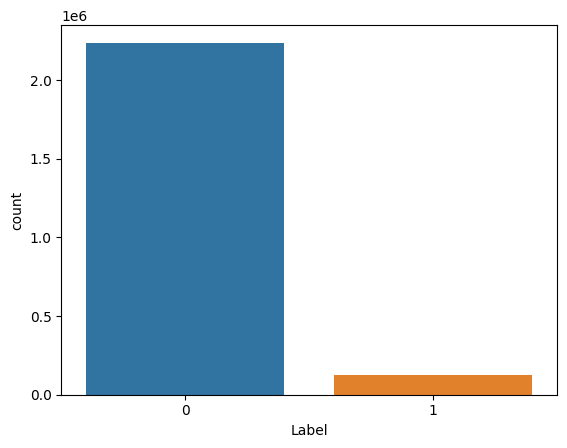

In [19]:
sns.countplot(x=df['Label'])

In [20]:
#df['Duration_Flows'] = df['FLOW_END_MILLISECONDS'] - df['FLOW_START_MILLISECONDS']
df['FLOW_DURATION_MILLISECONDS'].iloc[20000]

1004

In [21]:
df['Duration_Flow'] = df['FLOW_END_MILLISECONDS'] - df['FLOW_START_MILLISECONDS']

In [22]:
#df['src_ip_hash'] = df['IPV4_SRC_ADDR'].apply(lambda x: hash(x) % 1000)
#df['src_ip_hash'].value_counts()
import hashlib
df['src_ip_hash'] = df['IPV4_SRC_ADDR'].apply(lambda x: int(hashlib.md5(x.encode()).hexdigest()[:8], 16) % 1000)
df['src_ip_hash'].value_counts()

src_ip_hash
571    225316
312    224942
817    224766
740    224274
345    223608
724    222835
434    215681
692    215238
857    214339
143    214165
389     35176
43      33820
831     31442
24      27255
864     11317
165      3940
683      3848
72       3833
719      3580
774       665
64        642
727       479
848       446
811       431
74        420
169       413
304       401
119       390
163       354
70        353
289       350
802       339
547        82
299        58
765        58
94         57
476        51
406        33
122        26
645         1
Name: count, dtype: int64

In [23]:
'''list_drop = ['FLOW_END_MILLISECONDS', 'FLOW_START_MILLISECONDS', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'RETRANSMITTED_IN_BYTES', 
             'RETRANSMITTED_OUT_BYTES', 'IN_BYTES', 'OUT_BYTES', 'ICMP_IPV4_TYPE', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'Attack']
len(list_drop)'''

"list_drop = ['FLOW_END_MILLISECONDS', 'FLOW_START_MILLISECONDS', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'RETRANSMITTED_IN_BYTES', \n             'RETRANSMITTED_OUT_BYTES', 'IN_BYTES', 'OUT_BYTES', 'ICMP_IPV4_TYPE', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'Attack']\nlen(list_drop)"

In [24]:
df

,FLOW_START_MILLISECONDS,FLOW_END_MILLISECONDS,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,...,SRC_TO_DST_IAT_AVG,SRC_TO_DST_IAT_STDDEV,DST_TO_SRC_IAT_MIN,DST_TO_SRC_IAT_MAX,DST_TO_SRC_IAT_AVG,DST_TO_SRC_IAT_STDDEV,Label,Attack,Duration_Flow,src_ip_hash
0,1424242193040,1424242193043,59.166.0.2,4894,149.171.126.3,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,3,571
1,1424242192744,1424242193079,59.166.0.4,52671,149.171.126.6,31992,6,11.0,4704,28,...,12,19,0,90,12,19,0,Benign,335,312
2,1424242190649,1424242193109,59.166.0.0,47290,149.171.126.9,6881,6,37.0,13662,238,...,10,119,0,1843,5,88,0,Benign,2460,740
3,1424242193145,1424242193146,59.166.0.8,43310,149.171.126.7,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,1,692
4,1424242193239,1424242193241,59.166.0.1,45870,149.171.126.1,53,17,5.0,130,2,...,0,0,0,0,0,0,0,Benign,2,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365419,1421972723458,1421972723766,59.166.0.6,8647,149.171.126.8,25,6,37.0,31366,42,...,7,21,0,74,10,25,0,Benign,308,143
2365420,1421972723557,1421972723563,59.166.0.2,4681,149.171.126.1,5190,6,37.0,2054,22,...,0,0,0,1,0,0,0,Benign,6,571
2365421,1421972723565,1421972723788,59.166.0.2,47560,149.171.126.2,6125,6,37.0,8928,14,...,16,46,0,174,44,67,0,Benign,223,571
2365422,1421972723758,1421972723759,59.166.0.3,44991,149.171.126.5,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,1,345


In [25]:
'''dff = df.drop(columns=['FLOW_END_MILLISECONDS', 'FLOW_START_MILLISECONDS', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'RETRANSMITTED_IN_BYTES', 
             'RETRANSMITTED_OUT_BYTES', 'IN_BYTES', 'OUT_BYTES', 'ICMP_IPV4_TYPE', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
             'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
             'NUM_PKTS_1024_TO_1514_BYTES',  'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_PKTS', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
             'PROTOCOL', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS', 'DURATION_IN', 'DURATION_IN', 'Duration_Flow',
             'MAX_TTL', 'MIN_TTL', 'Attack'], axis=1)
plt.figure(figsize=(20,18)) 
sns.heatmap(dff.corr(), annot=True, fmt=".1f", linewidth=.5);'''

'dff = df.drop(columns=[\'FLOW_END_MILLISECONDS\', \'FLOW_START_MILLISECONDS\', \'IPV4_SRC_ADDR\', \'IPV4_DST_ADDR\', \'RETRANSMITTED_IN_BYTES\', \n             \'RETRANSMITTED_OUT_BYTES\', \'IN_BYTES\', \'OUT_BYTES\', \'ICMP_IPV4_TYPE\', \'CLIENT_TCP_FLAGS\', \'SERVER_TCP_FLAGS\',\n             \'NUM_PKTS_UP_TO_128_BYTES\', \'NUM_PKTS_128_TO_256_BYTES\', \'NUM_PKTS_256_TO_512_BYTES\', \'NUM_PKTS_512_TO_1024_BYTES\',\n             \'NUM_PKTS_1024_TO_1514_BYTES\',  \'RETRANSMITTED_IN_PKTS\', \'RETRANSMITTED_OUT_PKTS\', \'TCP_WIN_MAX_IN\', \'TCP_WIN_MAX_OUT\',\n             \'PROTOCOL\', \'IN_PKTS\', \'OUT_PKTS\', \'TCP_FLAGS\', \'DURATION_IN\', \'DURATION_IN\', \'Duration_Flow\',\n             \'MAX_TTL\', \'MIN_TTL\', \'Attack\'], axis=1)\nplt.figure(figsize=(20,18)) \nsns.heatmap(dff.corr(), annot=True, fmt=".1f", linewidth=.5);'

In [26]:
df

,FLOW_START_MILLISECONDS,FLOW_END_MILLISECONDS,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,...,SRC_TO_DST_IAT_AVG,SRC_TO_DST_IAT_STDDEV,DST_TO_SRC_IAT_MIN,DST_TO_SRC_IAT_MAX,DST_TO_SRC_IAT_AVG,DST_TO_SRC_IAT_STDDEV,Label,Attack,Duration_Flow,src_ip_hash
0,1424242193040,1424242193043,59.166.0.2,4894,149.171.126.3,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,3,571
1,1424242192744,1424242193079,59.166.0.4,52671,149.171.126.6,31992,6,11.0,4704,28,...,12,19,0,90,12,19,0,Benign,335,312
2,1424242190649,1424242193109,59.166.0.0,47290,149.171.126.9,6881,6,37.0,13662,238,...,10,119,0,1843,5,88,0,Benign,2460,740
3,1424242193145,1424242193146,59.166.0.8,43310,149.171.126.7,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,1,692
4,1424242193239,1424242193241,59.166.0.1,45870,149.171.126.1,53,17,5.0,130,2,...,0,0,0,0,0,0,0,Benign,2,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365419,1421972723458,1421972723766,59.166.0.6,8647,149.171.126.8,25,6,37.0,31366,42,...,7,21,0,74,10,25,0,Benign,308,143
2365420,1421972723557,1421972723563,59.166.0.2,4681,149.171.126.1,5190,6,37.0,2054,22,...,0,0,0,1,0,0,0,Benign,6,571
2365421,1421972723565,1421972723788,59.166.0.2,47560,149.171.126.2,6125,6,37.0,8928,14,...,16,46,0,174,44,67,0,Benign,223,571
2365422,1421972723758,1421972723759,59.166.0.3,44991,149.171.126.5,53,17,5.0,146,2,...,0,0,0,0,0,0,0,Benign,1,345


In [112]:
X = df.drop(columns=['Label', 'Attack', 'src_ip_hash', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'OUT_PKTS', 'SRC_TO_DST_SECOND_BYTES', 'NUM_PKTS_UP_TO_128_BYTES']+drop_list, axis=1)
y = df['Label']

In [258]:
lll = ['Label', 'Attack', 'src_ip_hash', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'OUT_PKTS', 'SRC_TO_DST_SECOND_BYTES', 'NUM_PKTS_UP_TO_128_BYTES']+drop_list

In [259]:
lll

['Label',
 'Attack',
 'src_ip_hash',
 'IPV4_SRC_ADDR',
 'IPV4_DST_ADDR',
 'OUT_PKTS',
 'SRC_TO_DST_SECOND_BYTES',
 'NUM_PKTS_UP_TO_128_BYTES',
 'FLOW_START_MILLISECONDS',
 'FLOW_END_MILLISECONDS',
 'PROTOCOL',
 'IN_PKTS',
 'OUT_BYTES',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'DURATION_IN',
 'SHORTEST_FLOW_PKT',
 'MIN_IP_PKT_LEN',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_IN_PKTS',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_128_TO_256_BYTES',
 'NUM_PKTS_256_TO_512_BYTES',
 'NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_1024_TO_1514_BYTES',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'ICMP_TYPE',
 'DNS_QUERY_ID',
 'DNS_TTL_ANSWER',
 'FTP_COMMAND_RET_CODE',
 'SRC_TO_DST_IAT_MIN',
 'SRC_TO_DST_IAT_MAX',
 'SRC_TO_DST_IAT_AVG',
 'SRC_TO_DST_IAT_STDDEV',
 'DST_TO_SRC_IAT_MIN',
 'DST_TO_SRC_IAT_MAX',
 'DST_TO_SRC_IAT_AVG',
 'DST_TO_SRC_IAT_STDDEV',
 'Duration_Flow']

In [113]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, shuffle=True, random_state=0)

In [115]:
X_train.shape

(2128881, 12)

In [116]:
scaler = StandardScaler()
scaler.fit(X_train)
model = LogisticRegression(n_jobs=8, multi_class='ovr', penalty='l2', solver='liblinear', C=0.5, tol=0.0001,
                           random_state=0)
model.fit(scaler.transform(X_train), y_train)
pred = model.predict(scaler.transform(X_test))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    223774
           1       0.99      1.00      1.00     12769

    accuracy                           1.00    236543
   macro avg       1.00      1.00      1.00    236543
weighted avg       1.00      1.00      1.00    236543



In [118]:
confusion_matrix(y_test, pred)

array([[223679,     95],
       [    20,  12749]], dtype=int64)

In [119]:
model.intercept_

array([-4.57800968])

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dtc = DecisionTreeClassifier()

In [122]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [250]:
dtc = DecisionTreeClassifier(max_depth=9, criterion='entropy', max_features=0.5, min_samples_leaf=5, random_state=0)

In [251]:
dtc.fit(scaler.transform(X_train), y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=0.5,
                       min_samples_leaf=5, random_state=0)

In [252]:
t_pred = dtc.predict(scaler.transform(X_test))

In [253]:
confusion_matrix(y_test, t_pred)

array([[223774,      0],
       [     0,  12769]], dtype=int64)

In [254]:
accuracy_score(y_test, t_pred)

1.0

In [255]:
dtc.feature_importances_

array([9.35376301e-05, 1.96773520e-04, 6.80264849e-04, 1.35960509e-04,
       0.00000000e+00, 8.38466075e-03, 9.89072714e-01, 3.28471384e-04,
       1.92623105e-05, 3.10413919e-05, 4.46147125e-05, 1.01269849e-03])

In [256]:
ff = pd.DataFrame(zip(dtc.feature_importances_, X_train.columns), columns=['Importance', 'Features'])

In [257]:
ff

,Importance,Features
0,0.000094,L4_SRC_PORT
1,0.000197,L4_DST_PORT
2,0.000680,L7_PROTO
3,0.000136,IN_BYTES
4,0.000000,DURATION_OUT
5,0.008385,MIN_TTL
6,0.989073,MAX_TTL
7,0.000328,LONGEST_FLOW_PKT
8,0.000019,MAX_IP_PKT_LEN
9,0.000031,SRC_TO_DST_AVG_THROUGHPUT


In [174]:
#drop_list = list(ff[ff['Importance'] <= 0.000002].Features)

In [175]:
param_dist = {'max_depth': [4, 6, 8, 10, 12], 'criterion':['gini', 'entropy'],
             'max_features':[0.6, 0.7, 0.8, 0.9], 'min_samples_leaf': [5, 7, 9 , 11]}
model = DecisionTreeClassifier(random_state=0)

In [176]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=30, scoring='accuracy', n_jobs=-1, cv=5,
                          refit=True,return_train_score = True)
rscv.fit(scaler.transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 10, 12],
                                        'max_features': [0.6, 0.7, 0.8, 0.9],
                                        'min_samples_leaf': [5, 7, 9, 11]},
                   return_train_score=True, scoring='accuracy')

In [177]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=0.8,
                       min_samples_leaf=7, random_state=0)

In [178]:
y_pred = rscv.best_estimator_.predict(scaler.transform(X_test))

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    223774
           1       1.00      1.00      1.00     12769

    accuracy                           1.00    236543
   macro avg       1.00      1.00      1.00    236543
weighted avg       1.00      1.00      1.00    236543



In [180]:
confusion_matrix(y_test, y_pred)

array([[223774,      0],
       [     1,  12768]], dtype=int64)